In [13]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [14]:
def loadData(path):
    listOfTestFiles = os.listdir(path=path)
    train = []
    train_labels = []
    test = []
    test_labels = []
        
        
    print("Training files = ",listOfTestFiles[1:6])
    for file in listOfTestFiles[1:6]:
        with open(path+file,'rb') as fo:
            dict = pickle.load(fo,encoding='bytes')
            train.append(dict[b'data'])
            train_labels.append(dict[b'labels'])

    print(listOfTestFiles[7])
    #for collecting Testing data
    with open(path+listOfTestFiles[7],'rb') as fo:
            dict = pickle.load(fo,encoding='bytes')
            test.append(dict[b'data'])
            test_labels.append(dict[b'labels'])

    dictData = {}
    dictData['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    dictData['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1]))
    dictData['test_data'] = np.reshape(np.array(test),newshape=(np.array(test).shape[0]*np.array(test).shape[1],np.array(test).shape[2]))
    dictData['test_labels'] = np.reshape(np.array(test_labels),newshape=(np.array(test_labels).shape[0]*np.array(test_labels).shape[1]))
    return dictData

In [15]:
dataset = loadData(path='cifar-10-batches-py/')

Training files =  ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
test_batch


In [16]:
dataset['train_data'].shape

(50000, 3072)

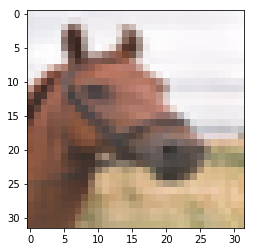

In [17]:
#visualizing train sample
temp = dataset['test_data'][99]

# Since every row represents one example to re-map it to image we have to form three 32,32 matrix,
#representing RGB values

R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))   #for stacking all these 32,32 matrices.
plt.imshow(temp)
plt.show()

In [18]:
x_train,y_train, x_test, y_test = dataset['train_data'],dataset['train_labels'],dataset['test_data'],dataset['test_labels']

In [19]:
#Splitting the data into train and validation set
# train = 49000 samples and validation set = 1000 samples

train_x,train_y = x_train[0:49000],y_train[0:49000]
val_x, val_y = x_train[49000:],y_train[49000:]

print("No. of training samples = ",train_x.shape[0])
print("No. of validation set samples = ",val_x.shape[0])

No. of training samples =  49000
No. of validation set samples =  1000


In [20]:
class NaiveClassifier(object):
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
        #to get no. of samples in train set 
        test_samples = X.shape[0]
        
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        
        #Calculating the l1 distance between current samples of test and train set
        for i in range(test_samples):
            print("Test example = ",i,end="\r")
            
            #label_count is array of zeros used to store the count for each class while comparing neighbours
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)   #take the absolute sum horizontally across columns
            
            #idx will contain k smallest indices at the start of the list
            #this is called partial sorting for more information look: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
            #min_ind will help us to slice through k indices which have minimum distance
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #This for loop iterates over min_ind and find the label present in train-set_Y for x
            #and increase the count at that particular index whenever any label is repeated.
            #Max value at any index is returned using np.argmax() and stored at ith index of Ypred i.e. predicted values
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)
    
    
        return Ypred

In [21]:
#lets use validation set for prediction and to calculate accuracy

knn = NaiveClassifier()
knn.train(train_x,train_y)

In [22]:
#hyper-parameter k = 1, similarity measure = L1

val_y_pred = knn.predict(val_x,1)

#Accuracy for validation set
print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.27
